In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
from keras.datasets import mnist

In [3]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [4]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


8


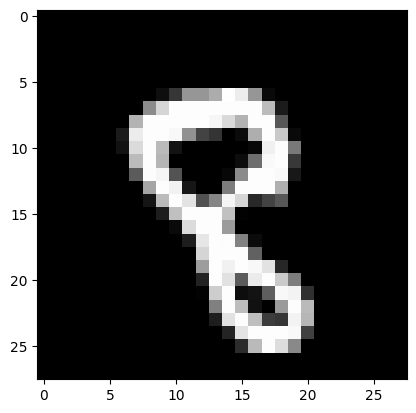

In [5]:
plt.imshow(train_X[6284], cmap = 'gray')
print(train_Y[6284])

In [6]:
print(np.unique(train_Y), len(np.unique(train_Y)))

[0 1 2 3 4 5 6 7 8 9] 10


In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [9]:
train_X = train_X/255
test_X = test_X/255

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


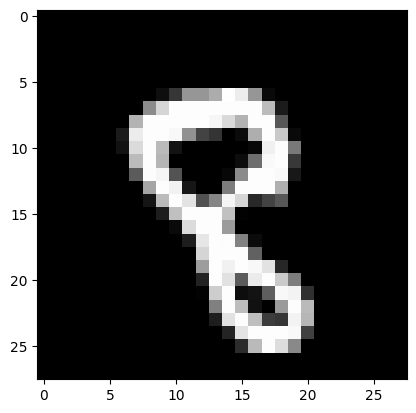

In [10]:
plt.imshow(train_X[6284], cmap = 'gray')
print(train_Y[6284])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential(name = 'ANN_MNIST_Classifier')
model.add(tf.keras.layers.Flatten())
model.add(Dense(600, input_dim = (784), activation = 'relu', name = 'Layer1'))
model.add(Dense(500, activation = 'relu', name = 'Layer2'))
model.add(Dense(300, activation = 'relu', name = 'Layer3'))
model.add(Dense(100, activation = 'relu', name = 'Layer4'))
model.add(Dense(50, activation = 'relu', name = 'Layer5'))
model.add(Dense(10, activation = 'softmax', name = 'Layer6'))

In [15]:
model.build((None, 784))
model.summary()

Model: "ANN_MNIST_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 Layer1 (Dense)              (None, 600)               471000    
                                                                 
 Layer2 (Dense)              (None, 500)               300500    
                                                                 
 Layer3 (Dense)              (None, 300)               150300    
                                                                 
 Layer4 (Dense)              (None, 100)               30100     
                                                                 
 Layer5 (Dense)              (None, 50)                5050      
                                                                 
 Layer6 (Dense)              (None, 10)       

In [17]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'Precision'])

In [18]:
hist = model.fit(train_X, train_Y, batch_size = 100, epochs = 10, validation_split = 0.1)

Epoch 1/10
540/540 [==============================] - 15s 24ms/step - loss: 0.2405 - accuracy: 0.9271 - precision: 0.9505 - val_loss: 0.1188 - val_accuracy: 0.9640 - val_precision: 0.9694
Epoch 2/10
540/540 [==============================] - 13s 23ms/step - loss: 0.0904 - accuracy: 0.9717 - precision: 0.9767 - val_loss: 0.0851 - val_accuracy: 0.9758 - val_precision: 0.9792
Epoch 3/10
540/540 [==============================] - 13s 24ms/step - loss: 0.0645 - accuracy: 0.9801 - precision: 0.9826 - val_loss: 0.0822 - val_accuracy: 0.9753 - val_precision: 0.9777
Epoch 4/10
540/540 [==============================] - 12s 23ms/step - loss: 0.0492 - accuracy: 0.9850 - precision: 0.9868 - val_loss: 0.0861 - val_accuracy: 0.9775 - val_precision: 0.9796
Epoch 5/10
540/540 [==============================] - 13s 24ms/step - loss: 0.0403 - accuracy: 0.9870 - precision: 0.9885 - val_loss: 0.1145 - val_accuracy: 0.9710 - val_precision: 0.9728
Epoch 6/10
540/540 [==============================] - 12s 22

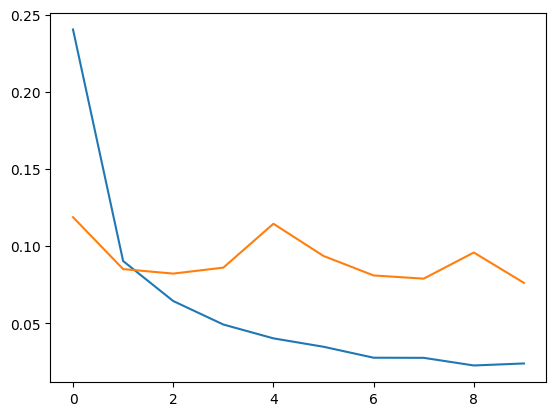

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

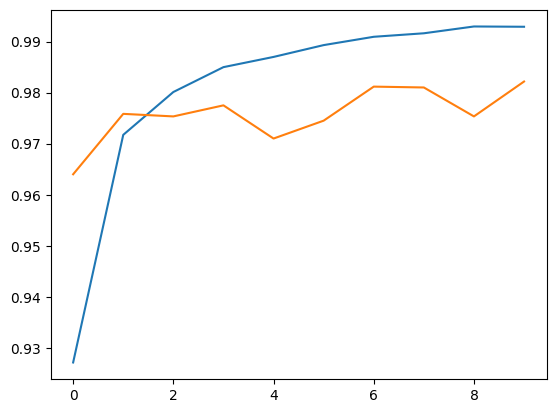

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

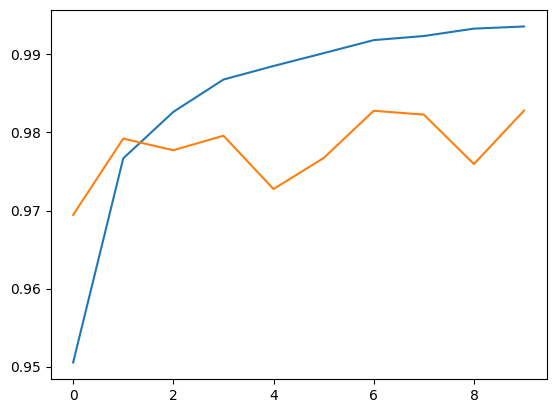

In [21]:
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])

In [25]:
print(model.predict(test_X[100].reshape(1, 28, 28)), model.predict(test_X[500].reshape(1, 28, 28)))
print(test_Y[100], test_Y[500])

1/1 [==============================] - 0s 27ms/step
[[4.6195082e-06 8.0553315e-09 1.9711499e-06 4.4953694e-09 1.1261874e-04
  1.8950398e-06 9.9987864e-01 1.3895646e-10 7.3860015e-08 7.1710851e-08]] [[2.4887531e-14 5.8458322e-13 2.7050816e-12 1.0000000e+00 6.2887046e-14
  1.0387464e-09 2.1522479e-17 1.8851999e-10 6.0541919e-11 3.1026165e-08]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [26]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 2s 4ms/step - loss: 0.0764 - accuracy: 0.9806 - precision: 0.9826


[0.07640032470226288, 0.9805999994277954, 0.9825528860092163]

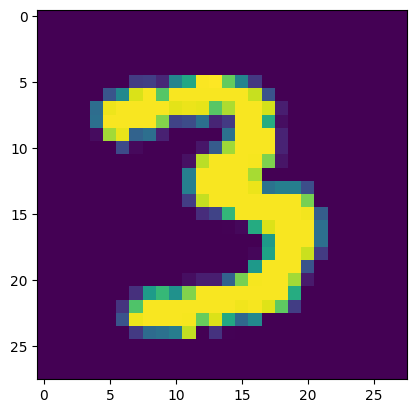

In [33]:
plt.imshow(test_X[500])

1/1 [==============================] - 0s 31ms/step
[[1.6129485e-06 1.2209944e-01 7.2957861e-05 9.8691789e-06 1.0280527e-04
  6.1971195e-06 7.4154954e-08 8.7748635e-01 4.6692426e-06 2.1611588e-04]] (1, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


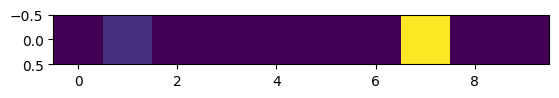

In [38]:
img = model.predict(test_X[111].reshape(1,28,28))
print(img, img.shape)
plt.imshow(img)
print(test_Y[111])